# HW 13 - Introduction to SciPy
ULAB - Physics and Astronomy Division
Due **Sunday, February 16th, 2025 at 11:59 PM** on Gradescope.

------

## 0 Academic Integrity

Please type the following message in the cell below as a comment. Sign with your name.

------

**I certify that I did not use AI tools, such as ChatGPT, to generate or write code for this assignment. All work submitted is my own and reflects my understanding of the material.**

------


In [66]:
# Your comment here
# I certify that I did not use AI tools, such as ChatGPT, to generate or write code for this assignment. All work submitted is my
# own and reflicts my understadong of the material. 

## 1 Simulate a Pendulum
A simple pendulum follows the equation:

$$
\frac{\text{d}^2\theta}{\text{d}t^2} + \frac{g}{L}\sin(\theta) = 0
$$

The goal is to **numerically solve the equation** and compare it to the small-angle approximation.

***Small-Angle Approximation:** a mathematical simplification used in physics when dealing with osciallatory motion, particularly for pendulums and trigonometric funcitons in general.*

Import `numpy`, `matplotlib` and `solve_ivp` in the cell below.

In [69]:
# Your code here 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Define the acceleration of gravity $g$ (two significant digits is fine) and the length of the pendulum $l$ in the cell below to **1 meter**.

In [72]:
# Your code here
g = 9.8
L = 1.0

Write a **function** called `pendulum` that contain the arguments `t` and `y`. Write out the differential equation. Follow the structure Brianna gave in lecture, it's very similar.

*Hint: The variable domega/dt should be equal to -(g / L) * np.sin(theta)*. I'll let you take care of the rest. 

In [75]:
# Your code here
def pendulum(t, y):
    theta, omega = y #y[0] = theta, y[1] = omega
    dtheta_dt = omega
    domega_dt =  -(g/L) * np.sin(theta)
    return[dtheta_dt, domega_dt]

Give you equation some initial conditions. Run the cell below.

In [78]:
theta_0 = np.radians(10) # Convert 10 degrees to radians
omega_0 = 0.0 # Initial angular velocity

Solve the differential equation using `solve_ivp`. Set the simulation time to **10 seconds** and the time for evaluation to **10 steps**.

In [100]:
# Your code here
t_span = (0, 10)
t_eval = np.linspace(0, 10, 500)

sol = solve_ivp(pendulum, t_span, [theta_0, omega_0], t_eval = t_eval)

Extrac the **theta** values (`sol.y`) and the **time** values (`sol.t`).

In [118]:
# Your code here
theta_values = sol.y[0]
time_values = sol.t


Calculate the theoretical period (aka small-angle approximation).

*Hint: Use `2 * np.pi * np.sqrt(L / g)`.*

In [121]:
# Your code here
theoretical_period = 2*np.pi*np.sqrt(L/g)

Print out the theoretical period (small-angle approximation) to **two** significant digits.

In [124]:
# Your code here
print(format(theoretical_period, '.2'))

2.0


Estimate the period from simulation by finding the first zero crossing. Run the cell below.

In [127]:
zero_crossings = np.where(np.diff(np.sign(theta_values)))[0]
if len(zero_crossings) >= 2:
    T_numerical = 2 * (time_values[zero_crossings[1]] - time_values[zero_crossings[0]])
else:
    T_numerical = None

Plot the results in the cell below. Add a **horizontal** line at `x=0`, give it an `x_label` of **Time (s)**, a `y_label` of **Theta (radians)** and a title.

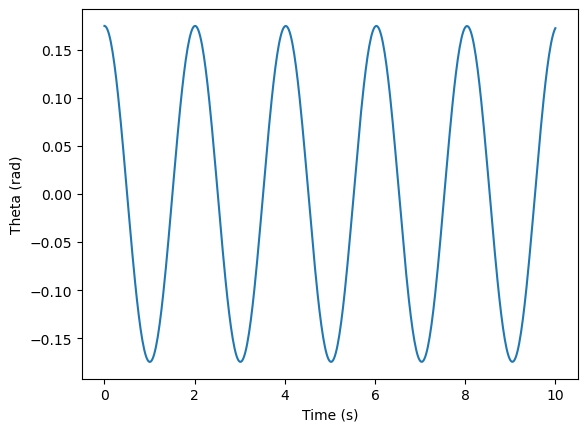

In [130]:
# Your code here
plt.plot(time_values, theta_values, label='numerical solution')
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.show()

Print out the numerical period (what you calculated with scipy) to **four** significant digits.

In [142]:
# Your code here
print(format(T_numerical, '.4'))

2.004


Compare the results between the small-angle approximation and numerical calculation. How well does the approximation match the numerical result?

In [ ]:
# Your comment here
# The small angle approximation does match the numerical result to the printed significant figures. However after the thousands place
# the small angle approximation no longer matches the numerical result.

## 2 Using Curve_Fit with Covid-19 Data
Import `pandas` in the cell below.

In [144]:
# Your code here
import pandas as pd

Run the cell below. If that doesn't work, then just **paste** the link into a web browser and it should automatically download. Then you can put the `.csv` file in the same directory as this notebook.

In [147]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

With the `pandas` function `read_csv`, import the data in the cell below as a dataframe `df`.

In [157]:
# Your code here
df = pd.read_csv("OWID COVID Data.csv")

Select **United States** as the country and make a new data frame called `df_country` with only this information.

In [175]:
# Your code here
df_country = df[df['iso_code'] == 'USA']
print(df_country)

       iso_code      continent       location        date  total_cases  \
403451      USA  North America  United States  2020-01-05          0.0   
403452      USA  North America  United States  2020-01-06          0.0   
403453      USA  North America  United States  2020-01-07          0.0   
403454      USA  North America  United States  2020-01-08          0.0   
403455      USA  North America  United States  2020-01-09          0.0   
...         ...            ...            ...         ...          ...   
405120      USA  North America  United States  2024-07-31  103436829.0   
405121      USA  North America  United States  2024-08-01  103436829.0   
405122      USA  North America  United States  2024-08-02  103436829.0   
405123      USA  North America  United States  2024-08-03  103436829.0   
405124      USA  North America  United States  2024-08-04  103436829.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
403451        0.0                 NaN       

From your `df_country` dataframe, extract only the relevant columns: **"date"** and **"total_cases"**. 

*Hint: Use `.dropna()` to get rid of the other data.*

In your `df_country` dataframe, add a new column called **"days since start"** and covert the data to numerical days.

*Hint: You can just take the length of your dataframe (`range(len(df_country))`).*

In [207]:
# Your code here
df_country = df_country[['date', 'total_cases']]
df_country.dropna()

df_country['days_since_start'] = range(len(df_country))

print(df_country)

              date  total_cases  days_since_start
403451  2020-01-05          0.0                 0
403452  2020-01-06          0.0                 1
403453  2020-01-07          0.0                 2
403454  2020-01-08          0.0                 3
403455  2020-01-09          0.0                 4
...            ...          ...               ...
405120  2024-07-31  103436829.0              1669
405121  2024-08-01  103436829.0              1670
405122  2024-08-02  103436829.0              1671
405123  2024-08-03  103436829.0              1672
405124  2024-08-04  103436829.0              1673

[1674 rows x 3 columns]


Print the first few rows of your `df_country` dataframe.

In [210]:
# Your code here
df_country.head()

,date,total_cases,days_since_start
403451,2020-01-05,0.0,0
403452,2020-01-06,0.0,1
403453,2020-01-07,0.0,2
403454,2020-01-08,0.0,3
403455,2020-01-09,0.0,4


In the cell below, import `curve_fit`. Make sure to have `numpy` imported in this notebook as well.

In [213]:
# Your code here
from scipy.optimize import curve_fit
import numpy as np

### Some background:
At the beginning of an outbreak, the number of cases follows an exponential growth model:

$$
C(t) = C_0 e^{rt}
$$

where
* $C(t)$ = number of cases at time $t$.
* $C_0$ = initial number of cases.
* $r$ = growth rate.
* $t$ = time in days.

Write a **function** called `exponential_growth` that takes in arguments `t`, `C_0` and `r`. Return the function given above.

In [227]:
# Your code here
def exponential_growth(t, C_0, r):
    C_t = C_0*np.exp(r*t)
    return C_t

Make a new variable called `days` and another new variable called `cases`. To the `days` variable give it the first 30 rows (your column **"days_since_start"**) and to the `cases` variable give it the first 30 rows (your column **"total_cases"**).

In [230]:
# Your code here
days = df_country['days_since_start'][:30]
cases = df_country['total_cases'][:30]
print(days, cases)

403451     0
403452     1
403453     2
403454     3
403455     4
403456     5
403457     6
403458     7
403459     8
403460     9
403461    10
403462    11
403463    12
403464    13
403465    14
403466    15
403467    16
403468    17
403469    18
403470    19
403471    20
403472    21
403473    22
403474    23
403475    24
403476    25
403477    26
403478    27
403479    28
403480    29
Name: days_since_start, dtype: int64 403451    0.0
403452    0.0
403453    0.0
403454    0.0
403455    0.0
403456    0.0
403457    0.0
403458    0.0
403459    0.0
403460    0.0
403461    0.0
403462    0.0
403463    0.0
403464    0.0
403465    0.0
403466    0.0
403467    0.0
403468    0.0
403469    0.0
403470    0.0
403471    0.0
403472    7.0
403473    7.0
403474    7.0
403475    7.0
403476    7.0
403477    7.0
403478    7.0
403479    9.0
403480    9.0
Name: total_cases, dtype: float64


With `curve_fit` fit the model. Give it the argument `p0 = [1, 0.1]`.

In [239]:
# Your code here
p0 = [1, 0.1]
popt, pcov = curve_fit(exponential_growth, days, cases, p0 = p0)

Extract the best-fit parameters from `popt`. Call them `C0_fit` and `r_fit`.

In [241]:
# Your code here
C0_fit = popt[0]
r_fit = popt[1]

Print your variables `C0_fit` with **two** significant digits. Print your variables `r_fit` with **four** significant digits.

In [247]:
# Your code here
print(format(C0_fit, '.2'), format(r_fit, '.4'))

0.12 0.1538


Make sure to have `matplotlib` imported. Make a variable called `future_days` give it a numpy range from `0` to `60`. We want to predict up to 60 days.

In [255]:
# Your code here
future_days = np.arange(60)

Make a variable called `predicted_cases` set it equal to your function `exponential_growth` with inputs being `future_days` and your `curve_fit` outputs. 

*Hint: You will want to use `*popt` as your `curve_fit` input.*

In [259]:
# Your code here 
predicted_cases = exponetial_growth(future_days, C0_fit, r_fit)

**Scater** the variable `cases` as a function of `days`. **Plot** the variable `future_days` as a function of `predicted_cases`. 

Don't forget a label for your x-axis, y-axis, title and legend.

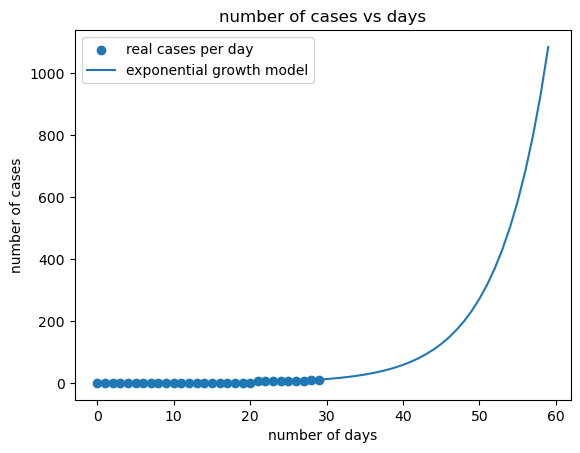

In [301]:
# Your code here
plt.scatter(days, cases, label = 'real cases per day')
plt.plot(future_days, predicted_cases, label = 'exponential growth model')

plt.xlabel('number of days')
plt.ylabel('number of cases')
plt.title('number of cases vs days')
plt.legend()
plt.show()

How well does your exponential model fit the actual COVID-19 data? 

In [ ]:
# Your comment here
The exponential model fits the actual COVID_19 data for the first 30 days

Make another plot but this time to **90 days**.

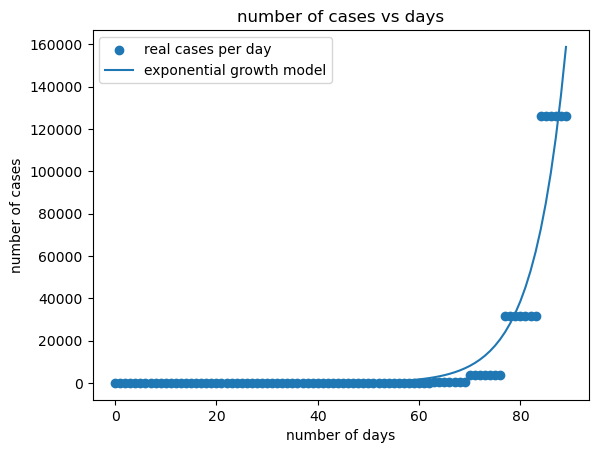

In [365]:
# Your code here
days = df_country['days_since_start'][:90]
cases = df_country['total_cases'][:90]
future_days = np.arange(90)

p0 = [1, 0.1]
popt, pcov = curve_fit(exponential_growth, days, cases, p0 = p0)
C0_fit = popt[0]
r_fit = popt[1]
predicted_cases = exponetial_growth(future_days, C0_fit, r_fit)

plt.scatter(days, cases, label = 'real cases per day')
plt.plot(future_days, predicted_cases, label = 'exponential growth model')

plt.xlabel('number of days')
plt.ylabel('number of cases')
plt.title('number of cases vs days')
plt.legend()
plt.show()

What does your model predict the number of cases to be at 87 days? Print in the cell below.

In [319]:
# Your code here
print(predicted_cases[87])

115969.56376970086


## 3 Seaborn
Use Seaborn to visualize your data, NOT matplotlib. 
1) Go to this website and **pick a dataset that interest you**: https://github.com/mwaskom/seaborn-data
2) Go to this website for documentation: https://seaborn.pydata.org/index.html
3) Import seaborn data (*Hint: You can use the function `sns.load dataset()`. For example, `sns.load dataset('planets')`.*
4) Make a cool plot!
5) With `scipy` add a model to your data. (This can be a different plot.)

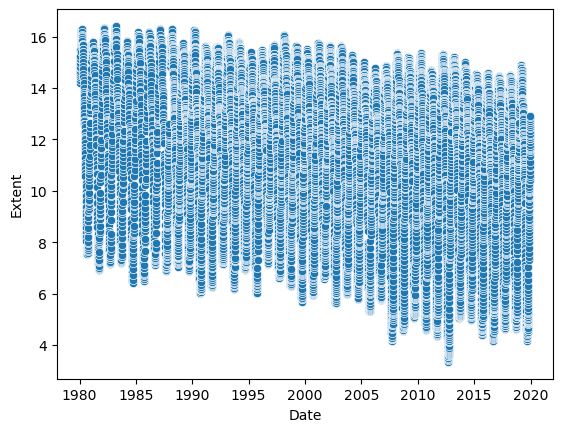

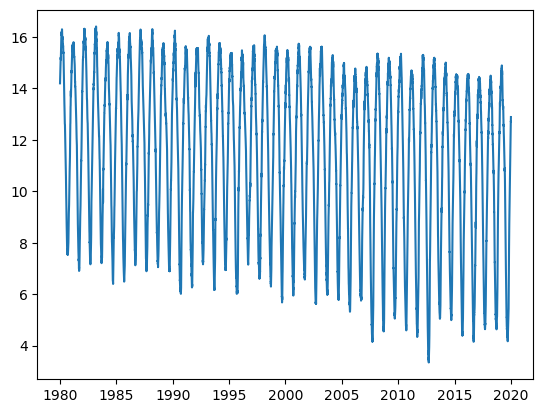

In [387]:
# Your code here
import seaborn as sns
seaice = sns.load_dataset('seaice')
sns.scatterplot(seaice, x = 'Date', y = 'Extent')
plt.show()

plt.plot(seaice['Date'], seaice['Extent'])


On it's own branch, submit this notebook to Gradescope! 